# First valid trajectory

In [1]:
%matplotlib notebook

In [2]:
import pykep as pk
import pygmo as pg
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

import gtocprep as g  # note that this is Mate's version available from https://github.com/mkisantal/gtoc-stuff
import math


In [3]:
V0 = 3000 # m/s
R0 = 1000 * g.RADIUS_SATURN # m
M0 = 5000 # kg
ISP = 308 # s
MPROP = 2000 # kg
T_START, T_END = 20000, 24000 # MJD2000
T_budget = 365.25

## Setting up bounds

In [4]:
placeholder = g.titan  # it will get overwritten

seq = [placeholder, g.enceladus, g.titan, g.tethys, g.rhea, g.dione, g.enceladus]

t0 = [pk.epoch(23947), pk.epoch(23949)]

tof = [[204.328848, 204.328848], [34.51, 34.53], [1.9, 1.92], [18.19, 18.2], [20.11, 20.12], [15, 60]]
vinf = [3000, 3000] # m/s

anomaly = [28, 30]

etas = None  # equivalent to [0, 1] for all etas


In [6]:
udp = g.MgaDsm1Full(seq, t0, tof, vinf, anomaly,
                    add_vinf_dep=False, add_vinf_arr=False, multi_objective=False,
                    impact=True, mass=[M0-MPROP, M0], isp=ISP, cw=False,
                    etas=etas)
prob = pg.problem(udp)
uda = pg.algorithms.sade(memory=True)
alg = pg.algorithm(uda)
pop = pg.population(prob, 20)

In [18]:
# if we use less propellant than 2000kg, then optimization objective is
# changed to impact energy. DV in case is the energy in GJ.

for i in tqdm(list(range(1000))):
    pop = alg.evolve(pop)
dv = pop.champion_f[0]
veff = ISP * pk.G0
mf = M0 / np.exp(dv / veff)
print('DV: {0:0.3f}m/s, propellant used: {1:0.3f}kg'.format(dv, M0 - mf))


DV: -55.921m/s, propellant used: -93.433kg


In [19]:
pop.champion_x

array([ 2.82745024e+01,  2.39482050e+04,  7.75961857e-01,  2.78655833e-01,
        3.00000000e+03,  6.88137546e-01,  2.04328848e+02,  2.76361935e+00,
        1.10000000e+00,  2.14720806e-04,  3.45150055e+01,  3.62329384e+00,
        5.98503441e+00,  8.77808766e-01,  1.91955722e+00, -5.41171611e+00,
        1.10000000e+00,  1.35998986e-01,  1.81999342e+01, -1.61159655e+00,
        2.88469617e+00,  6.50483733e-01,  2.01199251e+01, -1.67235864e+00,
        1.67257897e+01,  7.23367283e-01,  5.75197553e+01])

In [22]:
udp.pretty(pop.champion_x)

First leg: pseudo to enceladus
Departure: 2065-Jul-26 04:55:07.791315 (23948.204951 mjd2000)
Duration: 204.328848d
VINF: 3000.000m/s
DSM after 140.606352d
DSM magnitude: 120.856165m/s

leg 2: enceladus to titan
Duration: 34.515005d
Fly-by epoch: 2066-Feb-15 12:48:40.258515 (24152.533799 mjd2000)
Fly-by radius: 1.100000 planetary radii
DSM after 0.007411d
DSM magnitude: 849.342630m/s

leg 3: titan to tethys
Duration: 1.919557d
Fly-by epoch: 2066-Mar-22 01:10:16.731690 (24187.048805 mjd2000)
Fly-by radius: 5.985034 planetary radii
DSM after 1.685004d
DSM magnitude: 347.701448m/s

leg 4: tethys to rhea
Duration: 18.199934d
Fly-by epoch: 2066-Mar-23 23:14:26.475826 (24188.968362 mjd2000)
Fly-by radius: 1.100000 planetary radii
DSM after 2.475173d
DSM magnitude: 98.299450m/s

leg 5: rhea to dione
Duration: 20.119925d
Fly-by epoch: 2066-Apr-11 04:02:20.793909 (24207.168296 mjd2000)
Fly-by radius: 2.884696 planetary radii
DSM after 13.087684d
DSM magnitude: 102.975563m/s

leg 6: dione to ence

<IPython.core.display.Javascript object>


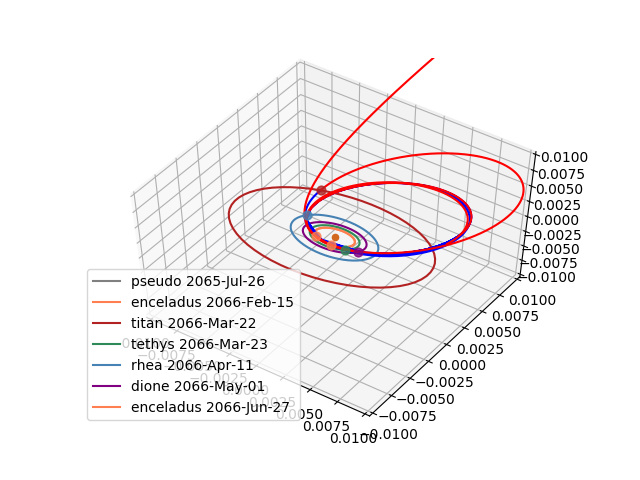

In [21]:
ax = udp.plot(pop.champion_x)
axlim = .01
ax.set_xlim3d(-axlim, axlim)
ax.set_ylim3d(-axlim, axlim)
ax.set_zlim3d(-axlim, axlim)
ax.view_init(elev=90, azim=90)
plt.show()